# Doctor's Consultation Fee (Not Final)

# NOTE - Incorrect Model (Under fitting model)/Incorrect Result

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [130]:
ds1=pd.read_excel('Doctor Consultation Final_Train.xlsx')
ds1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [131]:
ds2=pd.read_excel('Doctor Consultation Final_Test.xlsx')
ds2

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [132]:
Train=pd.DataFrame(ds1)
print(Train.shape)
Train.head()

(5961, 7)


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [133]:
Test=pd.DataFrame(ds2)
print(Test.shape)
Test.head()

(1987, 6)


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [134]:
Train.Qualification.value_counts()

BDS                                                                                                     488
BHMS                                                                                                    477
BAMS                                                                                                    471
MBBS                                                                                                    334
MBBS, MS - ENT                                                                                          220
                                                                                                       ... 
MBBS, Diploma in Dermatology, DDVL                                                                        1
MBBS, DNB - Internal Medicine, Certificate Course in Evidence Based Diabetes Management (CCEBDM)          1
MBBS, MD - Dermatology , Venereology & Leprosy, MRCP (UK)                                                 1
MBBS, MD - Family Medicine, 

In [135]:
Train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [136]:
Train.shape

(5961, 7)

In [137]:
Train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [138]:
Train.describe(include=['object', 'bool'])

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,5961,5961,2659,5936,5961,3341
unique,1420,64,51,877,6,2998
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...
freq,488,323,684,75,1397,40


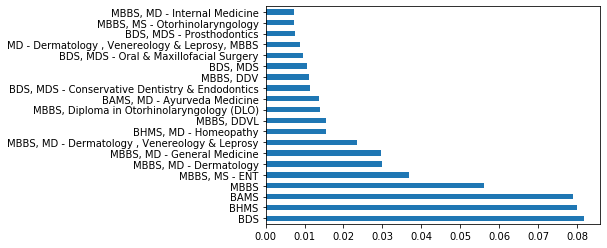

In [139]:

Train['Qualification'].value_counts(normalize=True)[:20].plot(kind='barh')

In [140]:
Train['Qualification'].value_counts(normalize=True)

BDS                                                                                                     0.081865
BHMS                                                                                                    0.080020
BAMS                                                                                                    0.079014
MBBS                                                                                                    0.056031
MBBS, MS - ENT                                                                                          0.036907
                                                                                                          ...   
MBBS, Diploma in Dermatology, DDVL                                                                      0.000168
MBBS, DNB - Internal Medicine, Certificate Course in Evidence Based Diabetes Management (CCEBDM)        0.000168
MBBS, MD - Dermatology , Venereology & Leprosy, MRCP (UK)                                       

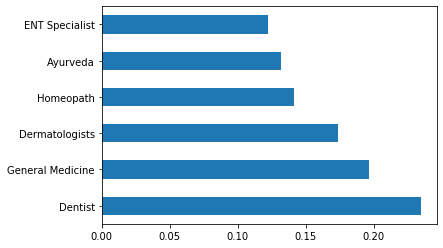

In [141]:
Train['Profile'].value_counts(normalize=True).plot(kind='barh')

In [142]:
Train['Profile'].value_counts(normalize=True)

Dentist             0.234357
General Medicine    0.196779
Dermatologists      0.173461
Homeopath           0.141419
Ayurveda            0.131857
ENT Specialist      0.122127
Name: Profile, dtype: float64

In [143]:
Train.Qualification.value_counts()

BDS                                                                                                     488
BHMS                                                                                                    477
BAMS                                                                                                    471
MBBS                                                                                                    334
MBBS, MS - ENT                                                                                          220
                                                                                                       ... 
MBBS, Diploma in Dermatology, DDVL                                                                        1
MBBS, DNB - Internal Medicine, Certificate Course in Evidence Based Diabetes Management (CCEBDM)          1
MBBS, MD - Dermatology , Venereology & Leprosy, MRCP (UK)                                                 1
MBBS, MD - Family Medicine, 

In [144]:
Train.Qualification.unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [145]:
Train_qual_profile = pd.crosstab(Train.Qualification, Train.Profile, margins=True)
Train_qual_profile

Profile,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,All
Qualification,,,,,,,
39 years experience,0,0,0,0,1,0,1
"Advanced Certificate Course in Aesthetic Dentistry, BDS, Professional Implantology Training Course (PITC), FAGE- FELLOW, Comprehensive Course in Modern Endodontics",0,1,0,0,0,0,1
"Ayurvedic panchkarma, BAMS",1,0,0,0,0,0,1
"B.Ac, BEMS",0,0,0,0,0,1,1
"B.Sc, BAMS",2,0,0,0,0,0,2
...,...,...,...,...,...,...,...
"Post Graduate Diploma in Healthcare Management(PGDHM), MBBS, MD - Internal Medicine",0,0,0,0,1,0,1
"Post Graduate Diploma in Periodontics and Implantology, Fellowship Program in Forensic Odontology, BDS",0,1,0,0,0,0,1
"Post MD SR AIIMS, MD - Dermatology, MBBS",0,0,1,0,0,0,1


In [146]:
#Sorting values

Train_qual_profile.sort_values(by=['All'], ascending=False)

Profile,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,All
Qualification,,,,,,,
All,786,1397,1034,728,1173,843,5961
BDS,0,488,0,0,0,0,488
BHMS,0,0,1,0,0,476,477
BAMS,470,0,0,0,0,1,471
MBBS,0,0,8,6,320,0,334
...,...,...,...,...,...,...,...
"DNB - Dermatology & Venereology, MBBS, DDVL",0,0,1,0,0,0,1
"DNB - Dermatology & Venereology, MBBS, DDV, DDVL",0,0,1,0,0,0,1
"DNB - Dermatology & Venereology, Fellowship in Cosmetology, DVD, MBBS",0,0,1,0,0,0,1


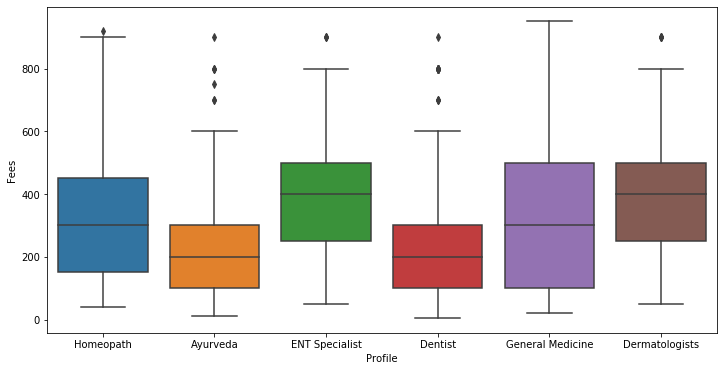

In [147]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Profile", y="Fees", data=Train)

In [148]:
# Finding Ayurveda doctors
Train['ayurveda_bams'] = np.where((Train.Profile == 'Ayurveda') & Train.Qualification.str.contains(r'\bBAMS\b'),1,0)
Train['ayurveda_ms'] = np.where((Train.Profile == 'Ayurveda') & Train.Qualification.str.contains(r'\bMS\b'),1,0)
Train['ayurveda_md'] = np.where((Train.Profile == 'Ayurveda') & Train.Qualification.str.contains(r'\bMD\b'),1,0)

In [149]:
Train[Train.Profile == 'Ayurveda'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,ayurveda_bams,ayurveda_ms,ayurveda_md
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,1,0,1
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,1,0,0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1,0,0
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100,1,0,0
11,BAMS,7 years experience,NaN,"Somajiguda, Hyderabad",Ayurveda,NaN,100,1,0,0


In [150]:
# Finidng Dentist in dataset
Train['dentist_bds'] = np.where((Train.Profile == 'Dentist') & Train.Qualification.str.contains(r'\bBDS\b'),1,0)
Train['dentist_mds'] = np.where((Train.Profile == 'Dentist') & Train.Qualification.str.contains(r'\bMDS\b'),1,0)
Train['dentist_orthodontics'] = np.where((Train.Profile == 'Dentist') & Train.Qualification.str.contains(r'orthodon', case=False),1,0)
Train['dentist_periodontics'] = np.where((Train.Profile == 'Dentist') & Train.Qualification.str.contains(r'periodon', case=False),1,0)
Train['dentist_prosthodontics'] = np.where((Train.Profile == 'Dentist') & Train.Qualification.str.contains(r'prosthodon', case=False),1,0)
Train['dentist_oralandmaxi'] = np.where((Train.Profile == 'Dentist') & Train.Qualification.str.contains(r'Oral & Maxillofacial Surgery', case=False),1,0)
Train['dentist_cosmetic'] = np.where((Train.Profile == 'Dentist') & Train.Qualification.str.contains(r'cosmetic', case=False),1,0)

In [151]:
Train[Train.Profile == 'Dentist'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,dentist_cosmetic
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,0,0,0,1,0,0,0,0,0,0
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100,0,0,0,1,0,0,0,0,0,0
12,"BDS, MDS",9 years experience,98%,"Coimbatore Racecourse, Coimbatore",Dentist,"98% 14 Feedback Coimbatore Racecourse, Coimbatore",200,0,0,0,1,1,0,0,0,0,0
13,"BDS, MDS - Oral & Maxillofacial Surgery",21 years experience,NaN,"Jubilee Hills, Hyderabad",Dentist,Dental Crowns Facet Dental Dental prophylaxis,350,0,0,0,1,1,0,0,0,1,0
20,"MDS, DNB, BDS",21 years experience,100%,"Pollachi, Coimbatore",Dentist,"100% 7 Feedback Pollachi, Coimbatore",100,0,0,0,1,1,0,0,0,0,0


In [152]:
# Finding Dermatology doctors
Train['dermatology_md'] = np.where((Train.Profile == 'Dermatologists') & Train.Qualification.str.contains(r'\bMD\b'),1,0)
Train['dermatology_venereology'] = np.where((Train.Profile == 'Dermatologists') & (Train.Qualification.str.contains(r'\bDDV\b') | Train.Qualification.str.contains(r'venereology', case=False)),1,0)
Train['dermatology_leprosy'] = np.where((Train.Profile == 'Dermatologists') & (Train.Qualification.str.contains(r'\bDDVL\b') | Train.Qualification.str.contains(r'leprosy', case=False)),1,0)
Train['dermatology_dnb'] = np.where((Train.Profile == 'Dermatologists') & Train.Qualification.str.contains(r'\bDNB\b'),1,0)
Train['dermatology_cosmetic'] = np.where((Train.Profile == 'Dermatologists') & Train.Qualification.str.contains(r'cosmetic', case=False),1,0)

Train[Train.Profile == 'Dermatologists'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,ayurveda_bams,ayurveda_ms,ayurveda_md,...,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,dentist_cosmetic,dermatology_md,dermatology_venereology,dermatology_leprosy,dermatology_dnb,dermatology_cosmetic
24,"MBBS, DDVL",23 years experience,NaN,"Andheri, Mumbai",Dermatologists,NaN,100,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29,"Diploma in Dermatology, MBBS",15 years experience,97%,"Defence Colony, Delhi",Dermatologists,"97% 60 Feedback Defence Colony, Delhi",500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,"MBBS, DDVL, Fellowship in Aesthetic Medicine",7 years experience,97%,"Banjara Hills, Hyderabad",Dermatologists,"97% 18 Feedback Banjara Hills, Hyderabad",500,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45,"MBBS, MD - Dermatology , Venereology & Leprosy",7 years experience,NaN,"Basheerbagh, Hyderabad",Dermatologists,NaN,500,0,0,0,...,0,0,0,0,0,1,1,1,0,0
48,"MBBS, DDVL",8 years experience,93%,"Madhapur, Hyderabad",Dermatologists,"93% 42 Feedback Madhapur, Hyderabad",400,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [153]:
# Finding "ENT - MS, Otorhinolaryngology, Oncology" doctors
Train['ent_ms'] = np.where((Train.Profile == 'ENT Specialist') & Train.Qualification.str.contains(r'\bMS\b'),1,0)
Train['ent_otorhinolaryngology'] = np.where((Train.Profile == 'ENT Specialist') & Train.Qualification.str.contains(r'otorhinolaryngology', case=False),1,0)
Train['ent_oncology'] = np.where((Train.Profile == 'ENT Specialist') & Train.Qualification.str.contains(r'oncology', case=False),1,0)

Train[Train.Profile == 'ENT Specialist'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,ayurveda_bams,ayurveda_ms,ayurveda_md,...,dentist_oralandmaxi,dentist_cosmetic,dermatology_md,dermatology_venereology,dermatology_leprosy,dermatology_dnb,dermatology_cosmetic,ent_ms,ent_otorhinolaryngology,ent_oncology
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,0,0,0,...,0,0,0,0,0,0,0,1,1,0
10,"MBBS, MS, DNB - ENT",5 years experience,NaN,"Thousand Lights, Chennai",ENT Specialist,NaN,700,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,"MBBS, Diploma in Otorhinolaryngology (DLO), DN...",12 years experience,NaN,"Kondli, Delhi",ENT Specialist,NaN,500,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16,"MBBS, Diploma in Otorhinolaryngology (DLO)",24 years experience,NaN,"Tambaram West, Chennai",ENT Specialist,NaN,100,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18,"MBBS, MS - ENT",19 years experience,79%,"KPHB, Hyderabad",ENT Specialist,"79% 8 Feedback KPHB, Hyderabad",400,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [154]:
# Finding "Homeopathy - BHMS, DHMS, MD" doctors
Train['homeopath_bhms'] = np.where((Train.Profile == 'Homeopath') & Train.Qualification.str.contains(r'\bBHMS\b'),1,0)
Train['homeopath_dhms'] = np.where((Train.Profile == 'Homeopath') & Train.Qualification.str.contains(r'\bDHMS\b'),1,0)
Train['homeopath_md'] = np.where((Train.Profile == 'Homeopath') & Train.Qualification.str.contains(r'\bMD\b'),1,0)

Train[Train.Profile == 'Homeopath'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,ayurveda_bams,ayurveda_ms,ayurveda_md,...,dermatology_venereology,dermatology_leprosy,dermatology_dnb,dermatology_cosmetic,ent_ms,ent_otorhinolaryngology,ent_oncology,homeopath_bhms,homeopath_dhms,homeopath_md
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17,"MBBS, MF- Homeopathy",5 years experience,NaN,"Purasawakkam, Chennai",Homeopath,NaN,300,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,"BHMS, Diploma in Cosmetology",12 years experience,90%,"Borivali West, Mumbai",Homeopath,"90% 2 Feedback Borivali West, Mumbai",300,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41,"BHMS, M. D. Hom. (Practice of Medicine)",12 years experience,100%,"Dahisar West, Mumbai",Homeopath,"100% 21 Feedback Dahisar West, Mumbai",500,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [155]:
# GM - Cardiology, Orthopedic Surgery, Gastroenterology, Urology, Dermatology, Anesthesiology, Plastic Surgery, Radiology, Emergency Medicine, General Surgery, Diabetology, Child/Pediatrics, Tuberculosis and Chest Diseases, Pharmacology, Maternity, Obstetrics & Gynaecology, Pathology, Pulmonary, Nephrology, Neurology, Sports, Oncology, Acupuncture, Psychiatry, Endocrinology, breast, Rheumatology, Ophthalmology/Opthalmology
Train['gm_md'] = np.where((Train.Profile == 'General Medicine') & Train.Qualification.str.contains(r'\bMD\b'),1,0)
Train['gm_cardio'] = np.where((Train.Profile == 'General Medicine') & Train.Qualification.str.contains(r'cardio', case=False),1,0)
Train['gm_surgery'] = np.where((Train.Profile == 'General Medicine') & Train.Qualification.str.contains(r'surgery', case=False),1,0)
Train['gm_diabet'] = np.where((Train.Profile == 'General Medicine') & Train.Qualification.str.contains(r'diabet', case=False),1,0)
Train['gm_child'] = np.where((Train.Profile == 'General Medicine') & (Train.Qualification.str.contains(r'child', case=False) | Train.Qualification.str.contains(r'pediat', case=False)),1,0)
Train['gm_chest'] = np.where((Train.Profile == 'General Medicine') & (Train.Qualification.str.contains(r'chest', case=False) | Train.Qualification.str.contains(r'tuber', case=False)),1,0)
Train['gm_obstet'] = np.where((Train.Profile == 'General Medicine') & (Train.Qualification.str.contains(r'obstet', case=False) | Train.Qualification.str.contains(r'gyna', case=False)),1,0)
Train['gm_pulmonary'] = np.where((Train.Profile == 'General Medicine') & Train.Qualification.str.contains(r'pulmonary', case=False),1,0)
Train['gm_psych'] = np.where((Train.Profile == 'General Medicine') & Train.Qualification.str.contains(r'psych', case=False),1,0)
Train['gm_endocrin'] = np.where((Train.Profile == 'General Medicine') & Train.Qualification.str.contains(r'endocrin', case=False),1,0)
Train['gm_rheum'] = np.where((Train.Profile == 'General Medicine') & Train.Qualification.str.contains(r'rheum', case=False),1,0)

Train[Train.Profile == 'General Medicine'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,ayurveda_bams,ayurveda_ms,ayurveda_md,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,"MBBS, MD - General Medicine",10 years experience,NaN,"Saroor Nagar, Hyderabad",General Medicine,NaN,200,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,MBBS,19 years experience,100%,"HSR Layout, Bangalore",General Medicine,"100% 4 Feedback HSR Layout, Bangalore",150,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,MBBS,41 years experience,NaN,"Chembur, Mumbai",General Medicine,NaN,200,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,"MBBS, Fellowship of College of General Practic...",31 years experience,NaN,"Thammanam, Ernakulam",General Medicine,NaN,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
Train.Profile

0              Homeopath
1               Ayurveda
2         ENT Specialist
3               Ayurveda
4               Ayurveda
              ...       
5956      ENT Specialist
5957    General Medicine
5958    General Medicine
5959    General Medicine
5960             Dentist
Name: Profile, Length: 5961, dtype: object

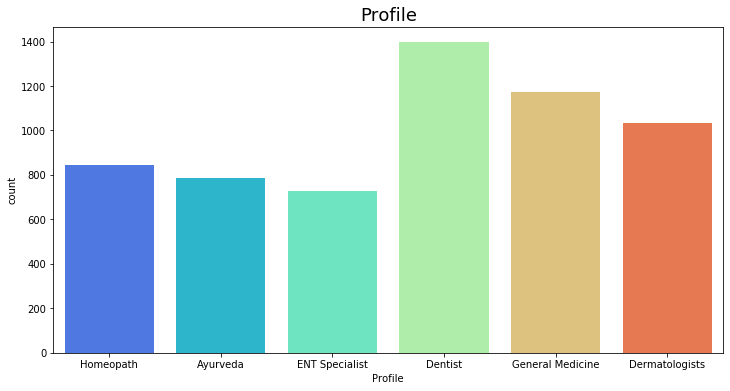

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [157]:

plt.figure(figsize=(12,6))
sns.countplot(x='Profile', data=Train, palette='rainbow')
plt.title('Profile', fontsize=18)
plt.show()

print(Train['Profile'].value_counts())

In [158]:
Train.Profile.sort_values()

1757     Ayurveda
563      Ayurveda
4648     Ayurveda
3688     Ayurveda
1449     Ayurveda
          ...    
5136    Homeopath
334     Homeopath
3830    Homeopath
5142    Homeopath
0       Homeopath
Name: Profile, Length: 5961, dtype: object

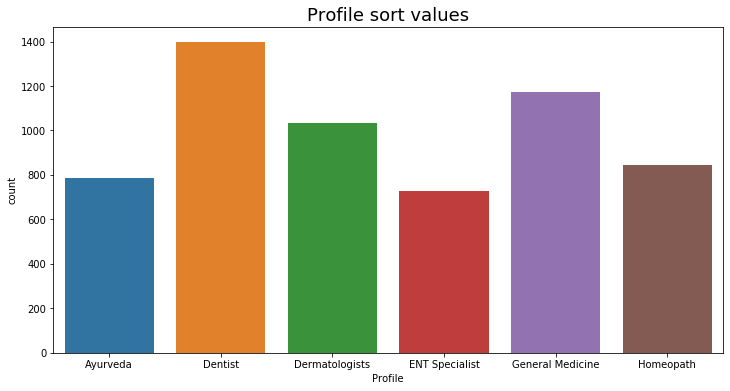

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [159]:
plt.figure(figsize=(12,6))
sns.countplot(x=Train.Profile.sort_values())
plt.title('Profile sort values', fontsize=18)
plt.show()

print(Train['Profile'].value_counts())

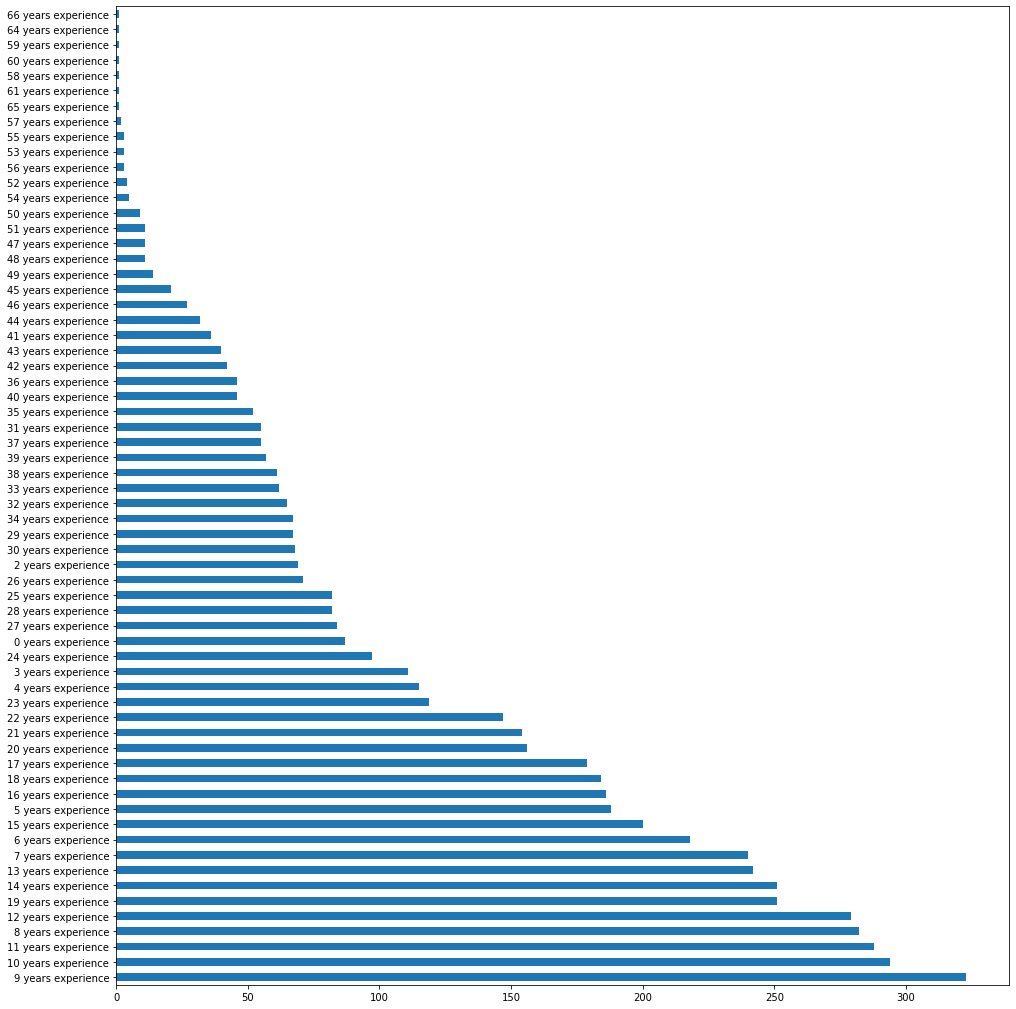

In [160]:
plt.figure(figsize=(16, 18))
Train['Experience'].value_counts().plot(kind='barh')

In [161]:
Train.Experience.sort_values(ascending=True)

3963    0 years experience
5187    0 years experience
640     0 years experience
383     0 years experience
3804    0 years experience
               ...        
859     9 years experience
2199    9 years experience
4772    9 years experience
4105    9 years experience
4984    9 years experience
Name: Experience, Length: 5961, dtype: object

In [162]:

Train['Total_Exp'] = Train['Experience'].str.replace(' years experience','').astype('int64')
Train.Total_Exp

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Total_Exp, Length: 5961, dtype: int64

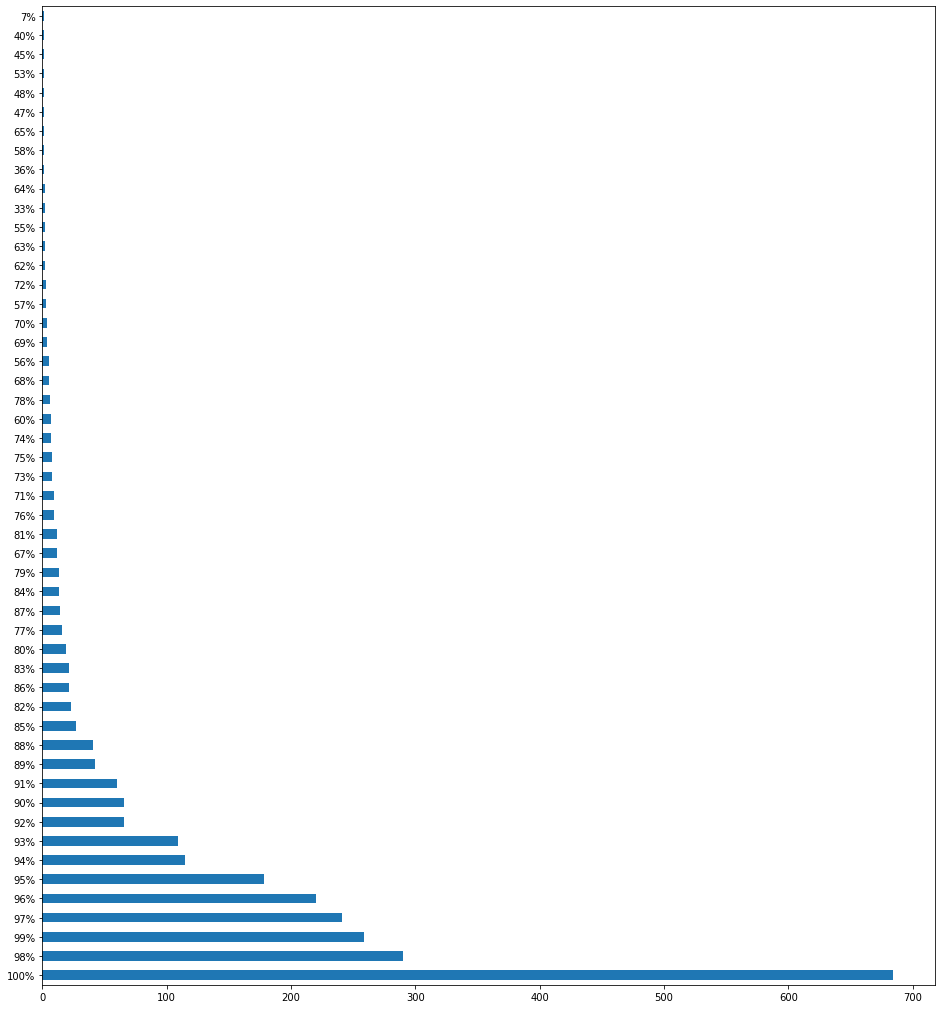

In [163]:
plt.figure(figsize=(16, 18))
Train['Rating'].value_counts().plot(kind='barh')

In [164]:
Train['rating_score'] = Train['Rating'].str.replace('%','').astype('float64')
Train.rating_score

0       100.0
1        98.0
2         NaN
3         NaN
4       100.0
        ...  
5956     98.0
5957      NaN
5958     97.0
5959     90.0
5960    100.0
Name: rating_score, Length: 5961, dtype: float64

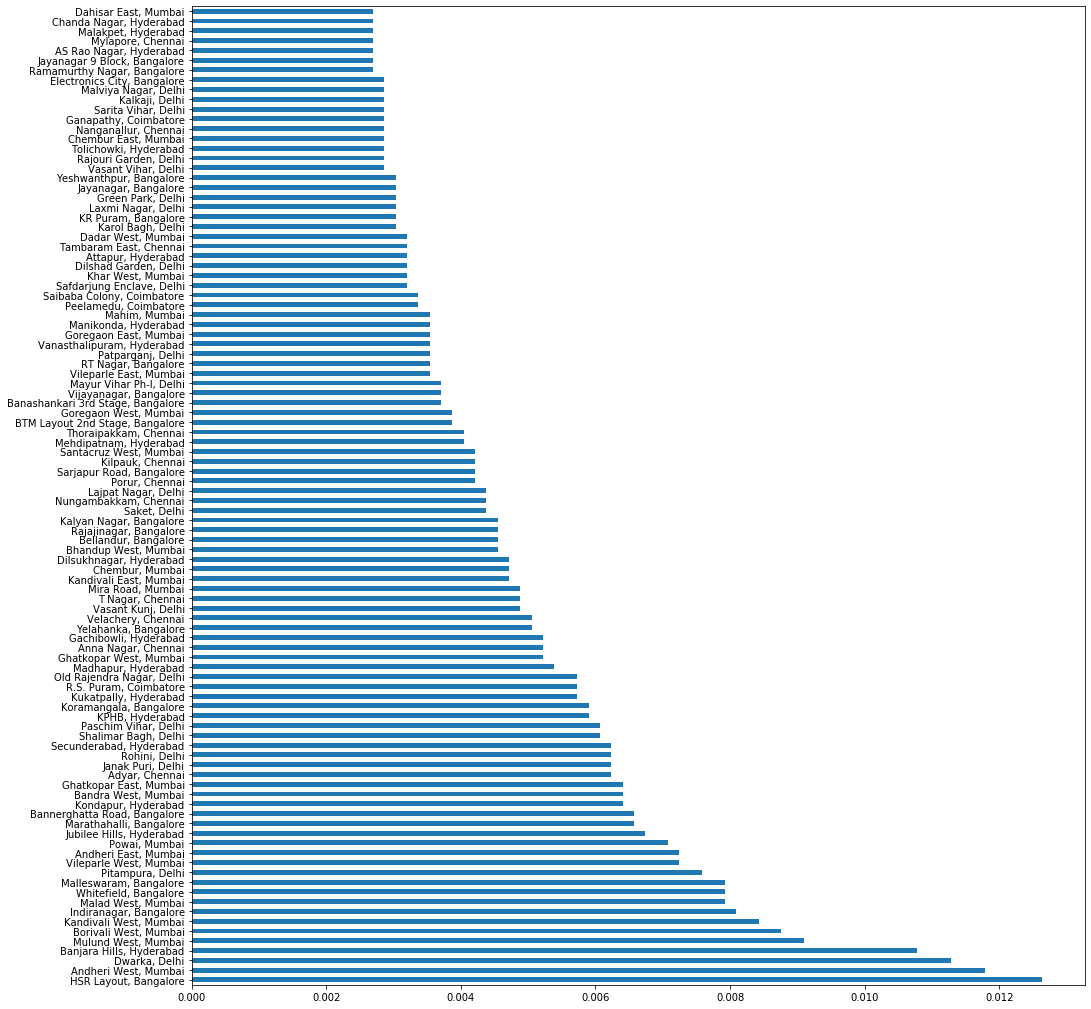

In [165]:
plt.figure(figsize=(16, 18))
Train['Place'].value_counts(normalize=True)[:100].plot(kind='barh')

In [166]:
Train['Place'].str.split(', ', expand=True)
Train.Place

0                 Kakkanad, Ernakulam
1               Whitefield, Bangalore
2          Mathikere - BEL, Bangalore
3        Bannerghatta Road, Bangalore
4               Keelkattalai, Chennai
                    ...              
5956          Basavanagudi, Bangalore
5957            Nungambakkam, Chennai
5958    Greater Kailash Part 2, Delhi
5959           Vileparle West, Mumbai
5960                 Pitampura, Delhi
Name: Place, Length: 5961, dtype: object

In [167]:
Train['City'] = Train['Place'].str.split(',').str[1]
Train['Locality'] = Train['Place'].str.split(',').str[0]
Train['City'].fillna("NaN",inplace = True)
Train['Locality'].fillna("NaN",inplace = True)

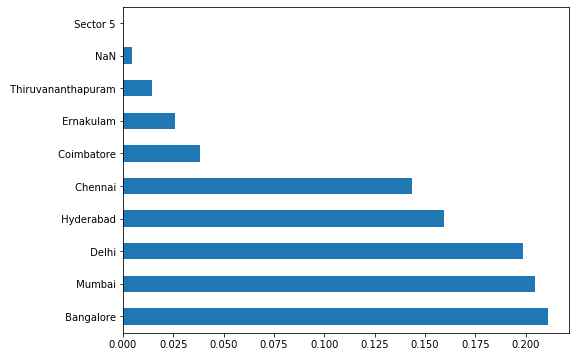

In [168]:
plt.figure(figsize=(8, 6))
Train['City'].value_counts(normalize=True).plot(kind='barh')

In [169]:
print(Train.City.value_counts)

<bound method IndexOpsMixin.value_counts of 0        Ernakulam
1        Bangalore
2        Bangalore
3        Bangalore
4          Chennai
           ...    
5956     Bangalore
5957       Chennai
5958         Delhi
5959        Mumbai
5960         Delhi
Name: City, Length: 5961, dtype: object>


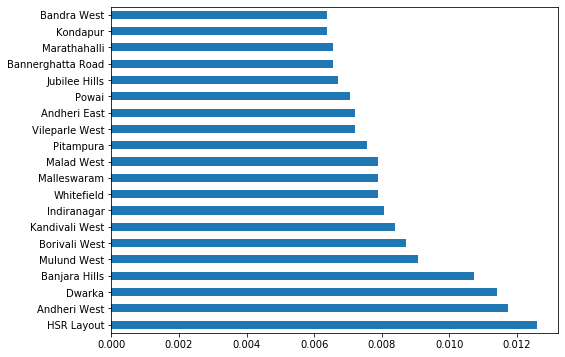

In [170]:
plt.figure(figsize=(8, 6))
Train['Locality'].value_counts(normalize=True)[:20].plot(kind='barh')

In [171]:
Train.Locality.value_counts

<bound method IndexOpsMixin.value_counts of 0                     Kakkanad
1                   Whitefield
2              Mathikere - BEL
3            Bannerghatta Road
4                 Keelkattalai
                 ...          
5956              Basavanagudi
5957              Nungambakkam
5958    Greater Kailash Part 2
5959            Vileparle West
5960                 Pitampura
Name: Locality, Length: 5961, dtype: object>

In [172]:
Train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,ayurveda_bams,ayurveda_ms,ayurveda_md,...,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score,City,Locality
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,...,0,0,0,0,0,0,24,100.0,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,1,0,1,...,0,0,0,0,0,0,12,98.0,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,0,0,0,...,0,0,0,0,0,0,9,NaN,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,1,0,0,...,0,0,0,0,0,0,12,NaN,Bangalore,Bannerghatta Road
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1,0,0,...,0,0,0,0,0,0,20,100.0,Chennai,Keelkattalai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,0,0,0,...,0,0,0,0,0,0,19,98.0,Bangalore,Basavanagudi
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,0,0,0,...,0,0,0,0,0,0,33,NaN,Chennai,Nungambakkam
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,0,0,0,...,0,0,0,0,0,0,41,97.0,Delhi,Greater Kailash Part 2
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,0,0,0,...,0,0,0,0,0,0,15,90.0,Mumbai,Vileparle West


In [173]:
#Now droping the columns which we already used for the simplifying data & columns which are not providing any inputs to dataset

Train=Train.drop(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Miscellaneous_Info'], axis=1)
Train.head()

,Fees,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,...,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score,City,Locality
0,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,24,100.0,Ernakulam,Kakkanad
1,350,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,12,98.0,Bangalore,Whitefield
2,300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,NaN,Bangalore,Mathikere - BEL
3,250,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,NaN,Bangalore,Bannerghatta Road
4,250,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,100.0,Chennai,Keelkattalai


In [174]:
Train

,Fees,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,...,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score,City,Locality
0,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,24,100.0,Ernakulam,Kakkanad
1,350,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,12,98.0,Bangalore,Whitefield
2,300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,NaN,Bangalore,Mathikere - BEL
3,250,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,NaN,Bangalore,Bannerghatta Road
4,250,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,100.0,Chennai,Keelkattalai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,19,98.0,Bangalore,Basavanagudi
5957,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,33,NaN,Chennai,Nungambakkam
5958,600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,41,97.0,Delhi,Greater Kailash Part 2
5959,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,90.0,Mumbai,Vileparle West


In [175]:
Train.isna().sum()

Fees                          0
ayurveda_bams                 0
ayurveda_ms                   0
ayurveda_md                   0
dentist_bds                   0
dentist_mds                   0
dentist_orthodontics          0
dentist_periodontics          0
dentist_prosthodontics        0
dentist_oralandmaxi           0
dentist_cosmetic              0
dermatology_md                0
dermatology_venereology       0
dermatology_leprosy           0
dermatology_dnb               0
dermatology_cosmetic          0
ent_ms                        0
ent_otorhinolaryngology       0
ent_oncology                  0
homeopath_bhms                0
homeopath_dhms                0
homeopath_md                  0
gm_md                         0
gm_cardio                     0
gm_surgery                    0
gm_diabet                     0
gm_child                      0
gm_chest                      0
gm_obstet                     0
gm_pulmonary                  0
gm_psych                      0
gm_endoc

In [176]:
Train.rating_score.sample(10)

5651    100.0
2518    100.0
5876      NaN
5839     98.0
759     100.0
1353    100.0
3127      NaN
1120     87.0
2784      NaN
2143    100.0
Name: rating_score, dtype: float64

In [177]:
#Here we can see that null values are present in rating_score column

print(Train['rating_score'].mean())

94.64347499059797


In [178]:
# Treat missing value with Mean rating
Train['rating_score'] = Train['rating_score'].fillna((Train['rating_score'].mean()))
Train.rating_score.sample(10)

4121     94.643475
931     100.000000
658      98.000000
871      95.000000
1963     94.643475
3186     94.643475
962      94.643475
2779     94.643475
1206     94.643475
61       99.000000
Name: rating_score, dtype: float64

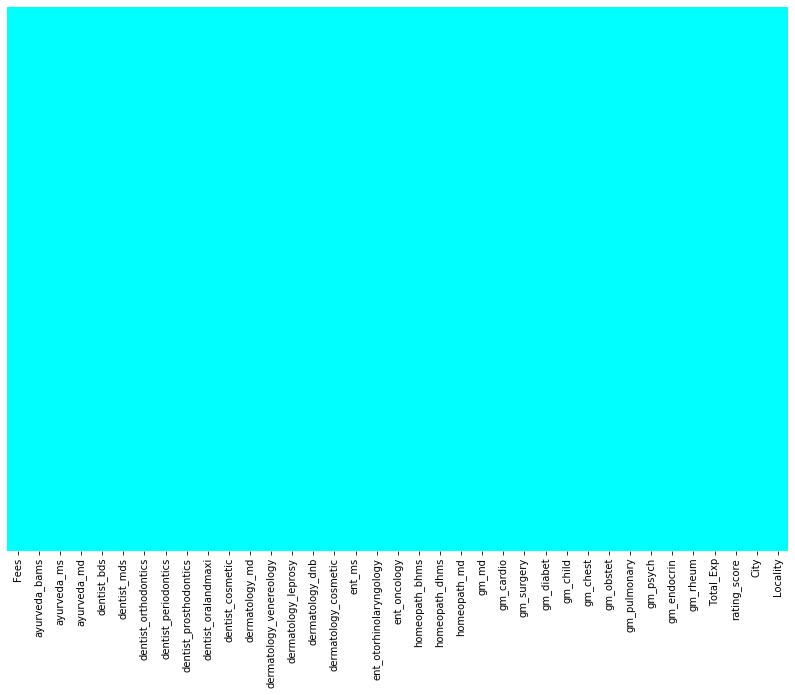

In [179]:
#seeing null value with heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(Train.isnull(),yticklabels=False, cbar=False, cmap='cool')

In [180]:
#Checking the summary of the dataset

Train.describe()

,Fees,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,...,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,...,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,307.944640,0.127328,0.007549,0.028351,0.228485,0.127495,0.024660,0.016105,0.020634,0.017614,...,0.020634,0.006039,0.002684,0.001678,0.002349,0.002013,0.003020,0.001678,17.303976,94.643475
std,190.920373,0.333368,0.086564,0.165987,0.419892,0.333555,0.155101,0.125889,0.142168,0.131557,...,0.142168,0.077484,0.051743,0.040927,0.048409,0.044826,0.054873,0.040927,11.142798,5.244204
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,94.643475
50%,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,94.643475
75%,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,96.000000
max,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,66.000000,100.000000


In [181]:
df_cor=Train.corr()
df_cor

,Fees,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,...,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score
Fees,1.000000,-0.138482,-0.007690,-0.017115,-0.198635,-0.086650,-0.035515,-0.051399,-0.038185,-0.009915,...,0.045143,-0.003244,0.033508,-0.007074,0.007058,-0.021866,0.037429,0.028356,0.002117,-0.090106
ayurveda_bams,-0.138482,1.000000,0.216698,0.395644,-0.207870,-0.146016,-0.060737,-0.048869,-0.055444,-0.051148,...,-0.055444,-0.029774,-0.019816,-0.015658,-0.018533,-0.017156,-0.021022,-0.015658,-0.048950,0.031530
ayurveda_ms,-0.007690,0.216698,1.000000,0.031811,-0.047462,-0.033339,-0.013868,-0.011158,-0.012659,-0.011678,...,-0.012659,-0.006798,-0.004525,-0.003575,-0.004232,-0.003917,-0.004800,-0.003575,-0.024645,0.000630
ayurveda_md,-0.017115,0.395644,0.031811,1.000000,-0.092958,-0.065297,-0.027161,-0.021854,-0.024794,-0.022873,...,-0.024794,-0.013315,-0.008862,-0.007002,-0.008288,-0.007672,-0.009401,-0.007002,0.008766,0.016433
dentist_bds,-0.198635,-0.207870,-0.047462,-0.092958,1.000000,0.662902,0.274155,0.225573,0.255482,0.224796,...,-0.078991,-0.042419,-0.028232,-0.022308,-0.026404,-0.024441,-0.029950,-0.022308,-0.196268,0.203405
dentist_mds,-0.086650,-0.146016,-0.033339,-0.065297,0.662902,1.000000,0.318670,0.330691,0.376176,0.346469,...,-0.055486,-0.029797,-0.019831,-0.015670,-0.018547,-0.017168,-0.021038,-0.015670,-0.118095,0.153379
dentist_orthodontics,-0.035515,-0.060737,-0.013868,-0.027161,0.274155,0.318670,1.000000,-0.020343,-0.023080,-0.013069,...,-0.023080,-0.012394,-0.008249,-0.006518,-0.007715,-0.007142,-0.008751,-0.006518,-0.037152,0.071226
dentist_periodontics,-0.051399,-0.048869,-0.011158,-0.021854,0.225573,0.330691,-0.020343,1.000000,-0.009196,-0.017132,...,-0.018570,-0.009973,-0.006637,-0.005245,-0.006207,-0.005746,-0.007041,-0.005245,-0.037580,0.051999
dentist_prosthodontics,-0.038185,-0.055444,-0.012659,-0.024794,0.255482,0.376176,-0.023080,-0.009196,1.000000,-0.019436,...,-0.021069,-0.011314,-0.007530,-0.005950,-0.007043,-0.006519,-0.007988,-0.005950,-0.056176,0.059224
dentist_oralandmaxi,-0.009915,-0.051148,-0.011678,-0.022873,0.224796,0.346469,-0.013069,-0.017132,-0.019436,1.000000,...,-0.019436,-0.010438,-0.006947,-0.005489,-0.006497,-0.006014,-0.007369,-0.005489,-0.002280,0.030582


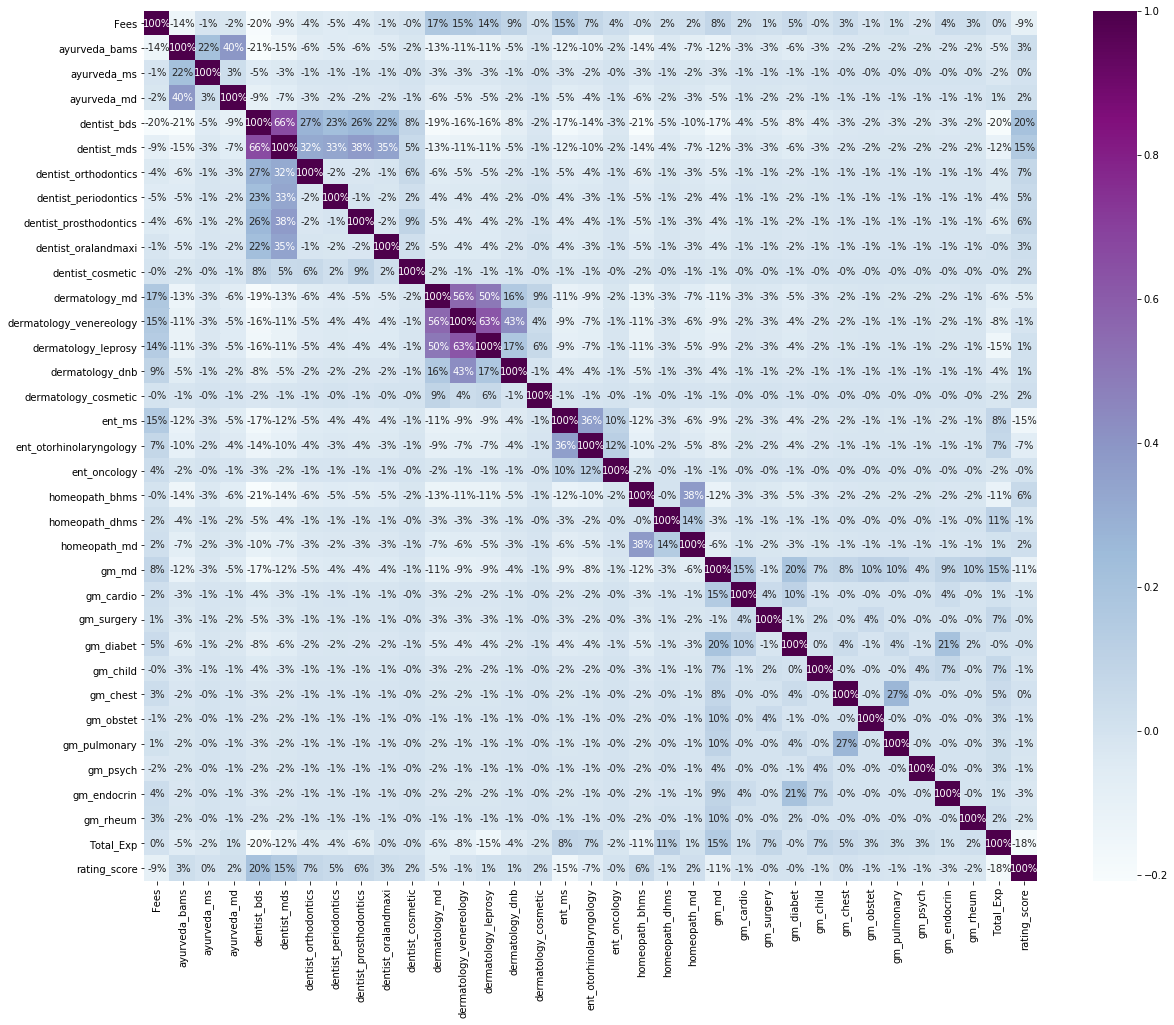

In [182]:
#Heatmap

plt.figure(figsize=(20, 16))
sns.heatmap(df_cor, annot=True, fmt='.0%', cmap='BuPu')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

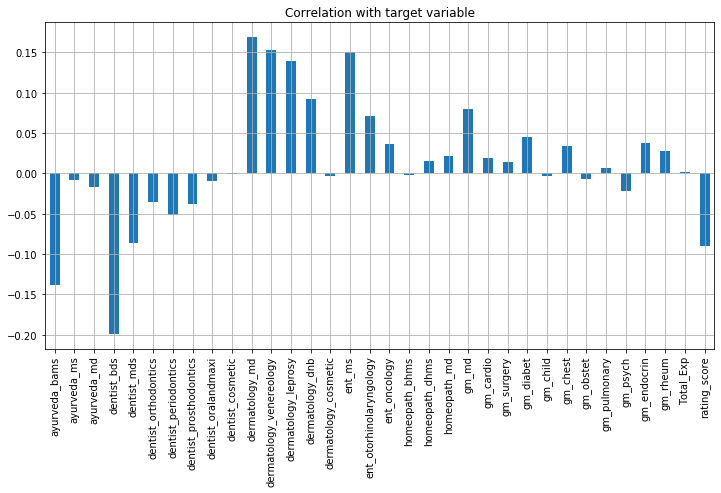

In [183]:
#Correlation with target column
plt.figure(figsize=(12, 6))
Train.drop('Fees', axis=1).corrwith(Train['Fees']).plot(kind='bar', grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target variable")

In [184]:
Train.dtypes

Fees                         int64
ayurveda_bams                int32
ayurveda_ms                  int32
ayurveda_md                  int32
dentist_bds                  int32
dentist_mds                  int32
dentist_orthodontics         int32
dentist_periodontics         int32
dentist_prosthodontics       int32
dentist_oralandmaxi          int32
dentist_cosmetic             int32
dermatology_md               int32
dermatology_venereology      int32
dermatology_leprosy          int32
dermatology_dnb              int32
dermatology_cosmetic         int32
ent_ms                       int32
ent_otorhinolaryngology      int32
ent_oncology                 int32
homeopath_bhms               int32
homeopath_dhms               int32
homeopath_md                 int32
gm_md                        int32
gm_cardio                    int32
gm_surgery                   int32
gm_diabet                    int32
gm_child                     int32
gm_chest                     int32
gm_obstet           

In [185]:
Train['rating_score'] = Train['rating_score'].astype(int)

In [186]:
# Import label encoder 
# Now lets replace the categorical values (alphabetic values) to numeric values using Label Encoder
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Lets Encode labels in columns 
Train['City']= label_encoder.fit_transform(Train['City'])
Train['Locality']= label_encoder.fit_transform(Train['Locality'])
Train.head()

,Fees,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,...,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score,City,Locality
0,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,24,100,4,296
1,350,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,12,98,0,856
2,300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,94,0,452
3,250,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,94,0,68
4,250,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,100,1,335


# Plotting Outliers

In [187]:
#splitting the data into input and output variable

df_x=Train.drop(columns=['Fees'])

In [188]:
#scaling the input variable 
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x, columns=df_x.columns)
x

,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,dentist_cosmetic,...,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score,City,Locality
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,1.000000,0.444444,0.341801
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.978495,0.000000,0.988453
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.136364,0.935484,0.000000,0.521940
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.935484,0.000000,0.078522
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.303030,1.000000,0.111111,0.386836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.287879,0.978495,0.000000,0.080831
5957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.935484,0.111111,0.618938
5958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.621212,0.967742,0.333333,0.248268
5959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.227273,0.892473,0.666667,0.971132


In [189]:
y=Train['Fees']
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

In [190]:
#Checking the shape of input and target variable

print(x.shape, '\t\t', y.shape)

(5961, 36) 		 (5961,)


In [191]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=42)

In [192]:
#checking the shape

print(x_train.shape, '\t\t', x_test.shape)

(4768, 36) 		 (1193, 36)


In [193]:
#Checking the shape

print(y_train.shape, '\t\t', y_test.shape)

(4768,) 		 (1193,)


In [194]:
#importing library

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Importing error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [195]:
#Using algorithms via for loop

model=[LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(), Lasso(), Ridge(), ElasticNet()]
for m in model:
    m.fit(x_train, y_train)
    print('Score of', m, 'is: ', m.score(x_train, y_train))
    predm=m.predict(x_test)
    print('\n')
    print('Error:')
    print('Mean absolute error:', mean_absolute_error(y_test, predm))
    print('Mean squared error:', mean_squared_error(y_test, predm))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, predm)))
    print('r2_score:', r2_score(y_test, predm))
    print('\n')
    print('*******************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is:  0.12672710785012842


Error:
Mean absolute error: 139.91290819803862
Mean squared error: 30551.54048300091
Root mean squared error: 174.78998965330055
r2_score: 0.11307456943398297


*******************************************************************************************************


Score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) is:  0.8805983010162951


Error:
Mean absolute error: 127.77857681714765
Mean squared error: 28259.684198197967

In [196]:
#cross validating the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(), Lasso(), Ridge(), ElasticNet()]
for m in model:
    score=cross_val_score(m, x, y, cv=5, scoring='r2')
    print('Score of', m, 'is:')
    print('\n')
    print('Score :', score)
    print('Mean Score :', score.mean())
    print('Standard deviation:', score.std())
    print('\n')
    print('*******************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is:


Score : [0.10488231 0.09327398 0.1262972  0.11173557 0.12420114]
Mean Score : 0.11207804022583163
Standard deviation: 0.012285297309460508


*******************************************************************************************************


Score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) is:


Score : [0.17232622 0.14083693 0.20262477 0.14683672 0.16848007]
Mean Score : 0.16622094140927787
Standard deviation: 0.021852749127712474


*****

# Analyzing The Test Dataset

In [197]:
Test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [198]:
Test.Qualification.value_counts()

BAMS                                                                                                                                                                                                                                           153
BHMS                                                                                                                                                                                                                                           150
BDS                                                                                                                                                                                                                                            144
MBBS                                                                                                                                                                                                                                           107
MBBS, MD - Dermatology      

In [199]:
Test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [200]:
Test.shape

(1987, 6)

In [201]:
Test.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987,1987,897,1981,1987,1153
unique,630,57,36,592,6,1084
top,BAMS,10 years experience,100%,"Andheri West, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
freq,153,110,223,27,444,10


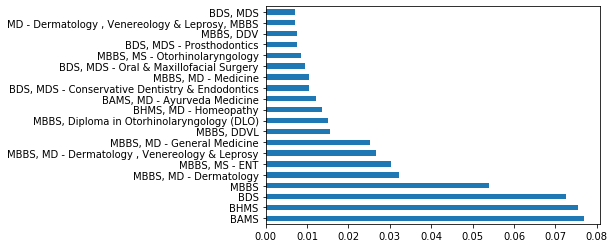

In [202]:

Test['Qualification'].value_counts(normalize=True)[:20].plot(kind='barh')

In [203]:
Test['Qualification'].value_counts(normalize=True)

BAMS                                                                                                                                                                                                                                           0.077001
BHMS                                                                                                                                                                                                                                           0.075491
BDS                                                                                                                                                                                                                                            0.072471
MBBS                                                                                                                                                                                                                                           0.053850
MBBS, MD

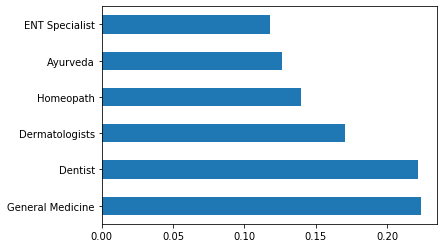

In [204]:
Test['Profile'].value_counts(normalize=True).plot(kind='barh')

In [205]:
Test['Profile'].value_counts(normalize=True)

General Medicine    0.223452
Dentist             0.221943
Dermatologists      0.170609
Homeopath           0.139406
Ayurveda            0.126321
ENT Specialist      0.118269
Name: Profile, dtype: float64

In [206]:
Test.Qualification.value_counts()

BAMS                                                                                                                                                                                                                                           153
BHMS                                                                                                                                                                                                                                           150
BDS                                                                                                                                                                                                                                            144
MBBS                                                                                                                                                                                                                                           107
MBBS, MD - Dermatology      

In [207]:
Test.Qualification.unique()

array(['MBBS', 'MBBS, Diploma in Otorhinolaryngology (DLO)', 'MBBS, DDVL',
       'BAMS', 'BDS, MDS - Conservative Dentistry & Endodontics',
       'BDS, MDS', 'BDS, MDS - Pedodontics',
       'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA',
       'BHMS', 'BDS', 'MBBS, FCD - Diabetology', 'MBBS, DDV',
       'MBBS, MD - Dermatology', 'MS - ENT',
       'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)',
       'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology',
       'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)',
       'BDS, MDS - Periodontics', 'BDS, MDS- Oral Pathology',
       'MBBS, MD - General Medicine', 'MS - ENT, MBBS',
       'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
       'MBBS, MS - ENT, DNB - Otorhinolaryngology',
       'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics',
       'B

In [208]:
Test_qual_profile = pd.crosstab(Test.Qualification, Test.Profile, margins=True)
Test_qual_profile

Profile,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,All
Qualification,,,,,,,
"B.Sc, BAMS, MD - Ayurveda Medicine",1,0,0,0,0,0,1
"B.Sc, BAMS, MD - Yoga and Rehab",1,0,0,0,0,0,1
"B.Sc, BHMS, Certificate in Food and Nutrition, Certificate Course in Advanced Homoeopathy (C.C.A.H)",0,0,0,0,0,1,1
"B.Sc, MBBS, FCCP - Pulmonary Medicine",0,0,0,0,1,0,1
"B.Sc, MBBS, MD - General Medicine, Master of Clinical Embryology, Diploma of Clinical Hypnotherapy",0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
"MS - Otorhinolaryngology, MBBS, DNB - ENT",0,0,0,1,0,0,1
"PhD - Orthodontics & Dentofacial Orthopaedics, BDS",0,1,0,0,0,0,1
"Post Graduate Certificate in Endodontics (PGCE), BDS",0,1,0,0,0,0,1


In [209]:
#Sorting values

Test_qual_profile.sort_values(by=['All'], ascending=False)

Profile,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,All
Qualification,,,,,,,
All,251,441,339,235,444,277,1987
BAMS,153,0,0,0,0,0,153
BHMS,0,0,0,0,0,150,150
BDS,0,144,0,0,0,0,144
MBBS,0,0,0,0,107,0,107
...,...,...,...,...,...,...,...
"MBBS, DNB - ENT, MS - ENT, FCPS - Oto-Rhino-Laryngology, Diploma in Otorhinolaryngology (DLO)",0,0,0,1,0,0,1
"MBBS, DNB - ENT, Fellowship in Neuro-Otology and Skull Base Surgery (USA)",0,0,0,1,0,0,1
"MBBS, DNB - ENT, Diploma in Otorhinolaryngology (DLO)",0,0,0,1,0,0,1


In [210]:
# Finding Ayurveda doctors
Test['ayurveda_bams'] = np.where((Test.Profile == 'Ayurveda') & Test.Qualification.str.contains(r'\bBAMS\b'),1,0)
Test['ayurveda_ms'] = np.where((Test.Profile == 'Ayurveda') & Test.Qualification.str.contains(r'\bMS\b'),1,0)
Test['ayurveda_md'] = np.where((Test.Profile == 'Ayurveda') & Test.Qualification.str.contains(r'\bMD\b'),1,0)

In [211]:
Test[Test.Profile == 'Ayurveda'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,ayurveda_bams,ayurveda_ms,ayurveda_md
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,1,0,0
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11 years experience,99%,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore",1,0,1
31,BAMS,36 years experience,100%,"Chandni Chowk, Delhi",Ayurveda,Treatment Of Erectile Dysfunction Male Sexual ...,1,0,0
39,BAMS,34 years experience,NaN,"Dahisar East, Mumbai",Ayurveda,NaN,1,0,0
40,BAMS,4 years experience,NaN,"Keelkattalai, Chennai",Ayurveda,NaN,1,0,0


In [212]:
# Finding Dentist in dataset
Test['dentist_bds'] = np.where((Test.Profile == 'Dentist') & Test.Qualification.str.contains(r'\bBDS\b'),1,0)
Test['dentist_mds'] = np.where((Test.Profile == 'Dentist') & Test.Qualification.str.contains(r'\bMDS\b'),1,0)
Test['dentist_orthodontics'] = np.where((Test.Profile == 'Dentist') & Test.Qualification.str.contains(r'orthodon', case=False),1,0)
Test['dentist_periodontics'] = np.where((Test.Profile == 'Dentist') & Test.Qualification.str.contains(r'periodon', case=False),1,0)
Test['dentist_prosthodontics'] = np.where((Test.Profile == 'Dentist') & Test.Qualification.str.contains(r'prosthodon', case=False),1,0)
Test['dentist_oralandmaxi'] = np.where((Test.Profile == 'Dentist') & Test.Qualification.str.contains(r'Oral & Maxillofacial Surgery', case=False),1,0)
Test['dentist_cosmetic'] = np.where((Test.Profile == 'Dentist') & Test.Qualification.str.contains(r'cosmetic', case=False),1,0)

In [213]:
Test[Test.Profile == 'Dentist'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,dentist_cosmetic
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,0,0,0,1,1,0,0,0,0,0
5,"BDS, MDS",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...,0,0,0,1,1,0,0,0,0,0
7,"BDS, MDS - Pedodontics",9 years experience,94%,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...,0,0,0,1,1,0,0,0,0,0
10,BDS,4 years experience,100%,"Erragadda, Hyderabad",Dentist,Dental Fillings Zirconia Crowns RCT - Single S...,0,0,0,1,0,0,0,0,0,0
15,BDS,4 years experience,NaN,"Mukherjee Nagar, Delhi",Dentist,"Mukherjee Nagar, Delhi ₹250 Visits Today",0,0,0,1,0,0,0,0,0,0


In [214]:
# Finding Dermatology/skin doctors
Test['dermatology_md'] = np.where((Test.Profile == 'Dermatologists') & Test.Qualification.str.contains(r'\bMD\b'),1,0)
Test['dermatology_venereology'] = np.where((Test.Profile == 'Dermatologists') & (Test.Qualification.str.contains(r'\bDDV\b') | Test.Qualification.str.contains(r'venereology', case=False)),1,0)
Test['dermatology_leprosy'] = np.where((Test.Profile == 'Dermatologists') & (Test.Qualification.str.contains(r'\bDDVL\b') | Test.Qualification.str.contains(r'leprosy', case=False)),1,0)
Test['dermatology_dnb'] = np.where((Test.Profile == 'Dermatologists') & Test.Qualification.str.contains(r'\bDNB\b'),1,0)
Test['dermatology_cosmetic'] = np.where((Test.Profile == 'Dermatologists') & Test.Qualification.str.contains(r'cosmetic', case=False),1,0)

Test[Test.Profile == 'Dermatologists'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,...,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,dentist_cosmetic,dermatology_md,dermatology_venereology,dermatology_leprosy,dermatology_dnb,dermatology_cosmetic
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,"MBBS, DDV",11 years experience,98%,"Kemps Corner, Mumbai",Dermatologists,"98% 28 Feedback Kemps Corner, Mumbai",0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13,"MBBS, MD - Dermatology",13 years experience,99%,"Banjara Hills, Hyderabad",Dermatologists,Laser Hair Removal - Face Skin Tag Treatment H...,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16,"MBBS, MD - Dermatology",16 years experience,87%,"Tis Hazari, Delhi",Dermatologists,"87% 9 Feedback Tis Hazari, Delhi",0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19,"MBBS, MD - Dermatology",32 years experience,90%,"Basavanagudi, Bangalore",Dermatologists,"90% 3 Feedback Basavanagudi, Bangalore",0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [215]:
# Finding "ENT - MS, Otorhinolaryngology, Oncology" doctors
Test['ent_ms'] = np.where((Test.Profile == 'ENT Specialist') & Test.Qualification.str.contains(r'\bMS\b'),1,0)
Test['ent_otorhinolaryngology'] = np.where((Test.Profile == 'ENT Specialist') & Test.Qualification.str.contains(r'otorhinolaryngology', case=False),1,0)
Test['ent_oncology'] = np.where((Test.Profile == 'ENT Specialist') & Test.Qualification.str.contains(r'oncology', case=False),1,0)

Test[Test.Profile == 'ENT Specialist'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,...,dentist_oralandmaxi,dentist_cosmetic,dermatology_md,dermatology_venereology,dermatology_leprosy,dermatology_dnb,dermatology_cosmetic,ent_ms,ent_otorhinolaryngology,ent_oncology
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23 years experience,94%,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore",0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14,MS - ENT,4 years experience,NaN,"Madandapuram, Chennai",ENT Specialist,NaN,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17,"MBBS, Diploma in Otorhinolaryngology (DLO), MS...",28 years experience,64%,"Banashankari 2nd Stage, Bangalore",ENT Specialist,"64% 4 Feedback Banashankari 2nd Stage, Bangalore",0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
25,"MBBS, Diploma in Otorhinolaryngology (DLO)",27 years experience,NaN,"Jeedimetla, Hyderabad",ENT Specialist,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [216]:
# Finding "Homeopathy - BHMS, DHMS, MD" doctors
Test['homeopath_bhms'] = np.where((Test.Profile == 'Homeopath') & Test.Qualification.str.contains(r'\bBHMS\b'),1,0)
Test['homeopath_dhms'] = np.where((Test.Profile == 'Homeopath') & Test.Qualification.str.contains(r'\bDHMS\b'),1,0)
Test['homeopath_md'] = np.where((Test.Profile == 'Homeopath') & Test.Qualification.str.contains(r'\bMD\b'),1,0)

Test[Test.Profile == 'Homeopath'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,...,dermatology_venereology,dermatology_leprosy,dermatology_dnb,dermatology_cosmetic,ent_ms,ent_otorhinolaryngology,ent_oncology,homeopath_bhms,homeopath_dhms,homeopath_md
9,BHMS,44 years experience,NaN,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20,"BHMS, Diploma in Naturopathy & Yogic Science (...",11 years experience,NaN,"Dadar, Mumbai",Homeopath,NaN,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36,BHMS,8 years experience,NaN,"Kolathur, Chennai",Homeopath,NaN,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37,"BSc, LCEH",28 years experience,NaN,"Jayanagar 9 Block, Bangalore",Homeopath,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,BHMS,18 years experience,NaN,"Dilsukhnagar, Hyderabad",Homeopath,Wrinkle Treatment Allergy Treatment Viral Feve...,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [217]:
# GM - Cardiology, Orthopedic Surgery, Gastroenterology, Urology, Dermatology, Anesthesiology, Plastic Surgery, Radiology, Emergency Medicine, General Surgery, Diabetology, Child/Pediatrics, Tuberculosis and Chest Diseases, Pharmacology, Maternity, Obstetrics & Gynaecology, Pathology, Pulmonary, Nephrology, Neurology, Sports, Oncology, Acupuncture, Psychiatry, Endocrinology, breast, Rheumatology, Ophthalmology/Opthalmology
Test['gm_md'] = np.where((Test.Profile == 'General Medicine') & Test.Qualification.str.contains(r'\bMD\b'),1,0)
Test['gm_cardio'] = np.where((Test.Profile == 'General Medicine') & Test.Qualification.str.contains(r'cardio', case=False),1,0)
Test['gm_surgery'] = np.where((Test.Profile == 'General Medicine') & Test.Qualification.str.contains(r'surgery', case=False),1,0)
Test['gm_diabet'] = np.where((Test.Profile == 'General Medicine') & Test.Qualification.str.contains(r'diabet', case=False),1,0)
Test['gm_child'] = np.where((Test.Profile == 'General Medicine') & (Test.Qualification.str.contains(r'child', case=False) | Test.Qualification.str.contains(r'pediat', case=False)),1,0)
Test['gm_chest'] = np.where((Test.Profile == 'General Medicine') & (Test.Qualification.str.contains(r'chest', case=False) | Test.Qualification.str.contains(r'tuber', case=False)),1,0)
Test['gm_obstet'] = np.where((Test.Profile == 'General Medicine') & (Test.Qualification.str.contains(r'obstet', case=False) | Test.Qualification.str.contains(r'gyna', case=False)),1,0)
Test['gm_pulmonary'] = np.where((Test.Profile == 'General Medicine') & Test.Qualification.str.contains(r'pulmonary', case=False),1,0)
Test['gm_psych'] = np.where((Test.Profile == 'General Medicine') & Test.Qualification.str.contains(r'psych', case=False),1,0)
Test['gm_endocrin'] = np.where((Test.Profile == 'General Medicine') & Test.Qualification.str.contains(r'endocrin', case=False),1,0)
Test['gm_rheum'] = np.where((Test.Profile == 'General Medicine') & Test.Qualification.str.contains(r'rheum', case=False),1,0)

Test[Test.Profile == 'General Medicine'].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,"MBBS, FCD - Diabetology",34 years experience,NaN,"Gandhipuram, Coimbatore",General Medicine,NaN,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23,"MBBS, PG Diploma In Clinical Cosmetology (PGDCC)",13 years experience,100%,"Begumpet, Hyderabad",General Medicine,"100% 10 Feedback Begumpet, Hyderabad",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,MBBS,43 years experience,NaN,"Kottivakkam, Chennai",General Medicine,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,"MBBS, MD - General Medicine",25 years experience,NaN,"Mulund West, Mumbai",General Medicine,Balance Exercises Acne / Pimples Treatment Ins...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
Test.Profile

0       General Medicine
1         ENT Specialist
2         Dermatologists
3               Ayurveda
4                Dentist
              ...       
1982            Ayurveda
1983      Dermatologists
1984    General Medicine
1985             Dentist
1986      Dermatologists
Name: Profile, Length: 1987, dtype: object

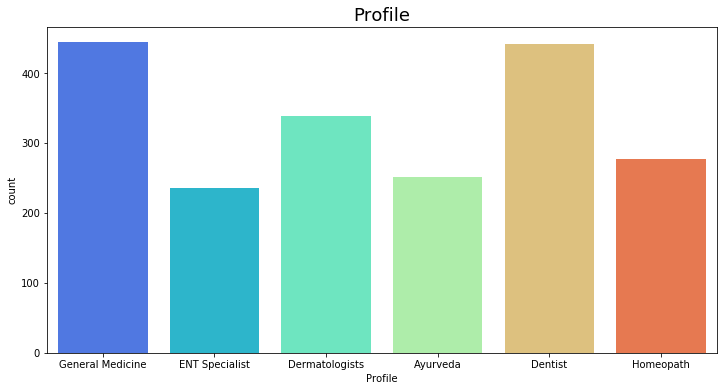

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64


In [219]:
plt.figure(figsize=(12,6))
sns.countplot(x='Profile', data=Test, palette='rainbow')
plt.title('Profile', fontsize=18)
plt.show()

print(Test['Profile'].value_counts())

In [220]:
Test.Profile.sort_values()

993      Ayurveda
1660     Ayurveda
665      Ayurveda
259      Ayurveda
668      Ayurveda
          ...    
1226    Homeopath
182     Homeopath
589     Homeopath
1221    Homeopath
1253    Homeopath
Name: Profile, Length: 1987, dtype: object

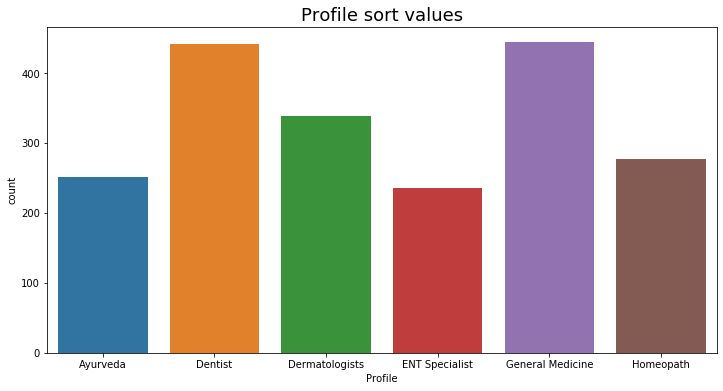

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64


In [221]:
plt.figure(figsize=(12,6))
sns.countplot(x=Test.Profile.sort_values())
plt.title('Profile sort values', fontsize=18)
plt.show()

print(Test['Profile'].value_counts())

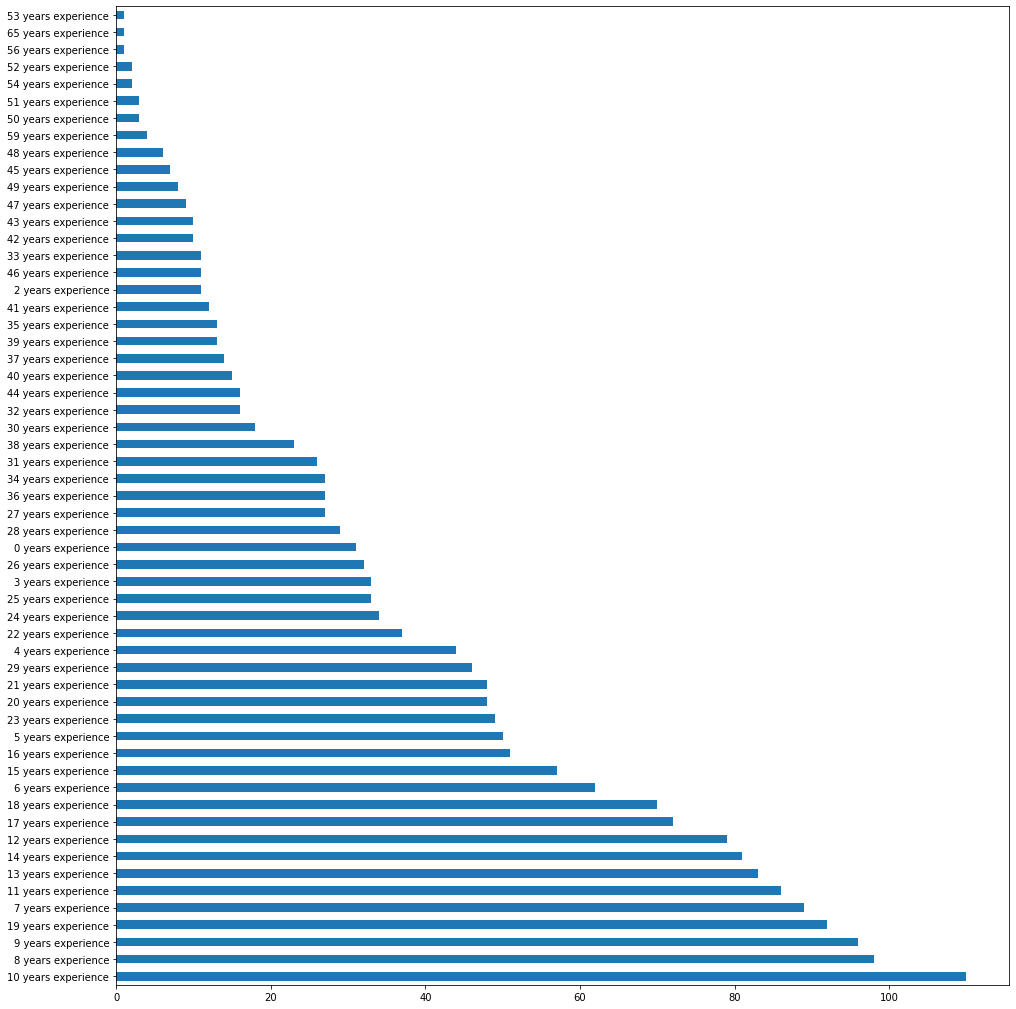

In [222]:
plt.figure(figsize=(16, 18))
Test['Experience'].value_counts().plot(kind='barh')

In [223]:
Test.Experience.sort_values(ascending=True)

669     0 years experience
1244    0 years experience
1930    0 years experience
1775    0 years experience
1392    0 years experience
               ...        
1464    9 years experience
912     9 years experience
1845    9 years experience
945     9 years experience
1772    9 years experience
Name: Experience, Length: 1987, dtype: object

In [224]:

Test['Total_Exp'] = Test['Experience'].str.replace(' years experience','').astype('int64')
Test.Total_Exp

0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Total_Exp, Length: 1987, dtype: int64

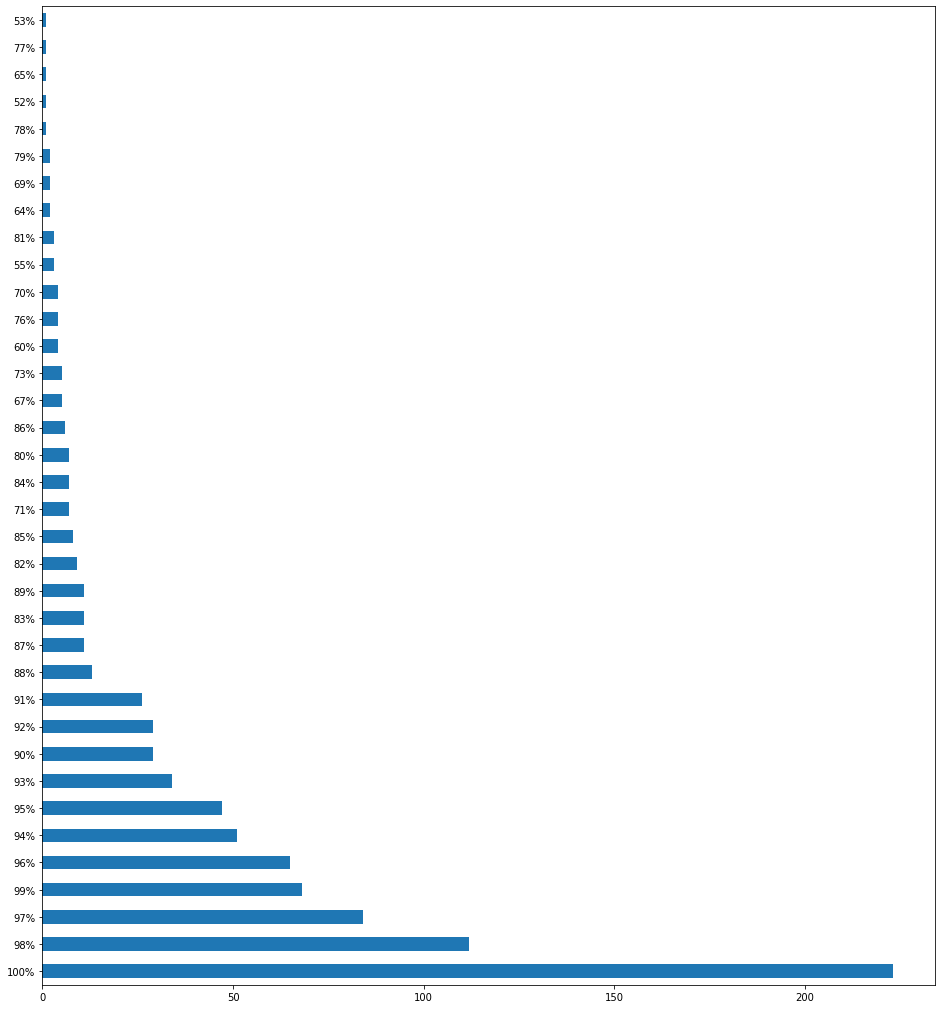

In [225]:
plt.figure(figsize=(16, 18))
Test['Rating'].value_counts().plot(kind='barh')

In [226]:
Test['rating_score'] = Test['Rating'].str.replace('%','').astype('float64')
Test.rating_score

0         NaN
1         NaN
2        70.0
3         NaN
4       100.0
        ...  
1982      NaN
1983      NaN
1984      NaN
1985     98.0
1986      NaN
Name: rating_score, Length: 1987, dtype: float64

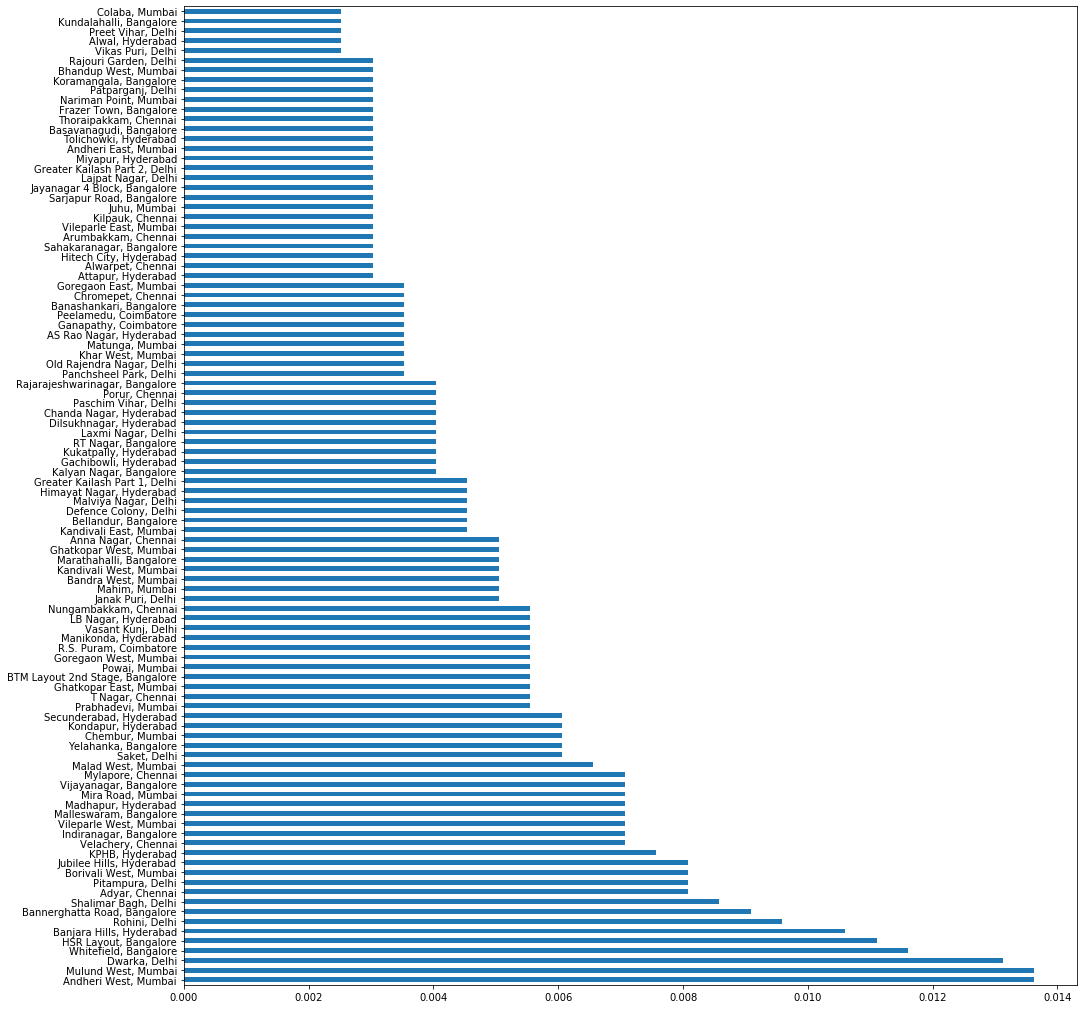

In [227]:
plt.figure(figsize=(16, 18))
Test['Place'].value_counts(normalize=True)[:100].plot(kind='barh')

In [228]:
Test['Place'].str.split(', ', expand=True)
Test.Place

0            Ghatkopar East, Mumbai
1       West Marredpally, Hyderabad
2                 KK Nagar, Chennai
3            New Ashok Nagar, Delhi
4         Kanakpura Road, Bangalore
                   ...             
1982        Basavanagudi, Bangalore
1983               Choolai, Chennai
1984                 Porur, Chennai
1985             Arekere, Bangalore
1986          Pallikaranai, Chennai
Name: Place, Length: 1987, dtype: object

In [229]:
Test['City'] = Test['Place'].str.split(',').str[1]
Test['Locality'] = Test['Place'].str.split(',').str[0]
Test['City'].fillna("NaN",inplace = True)
Test['Locality'].fillna("NaN",inplace = True)

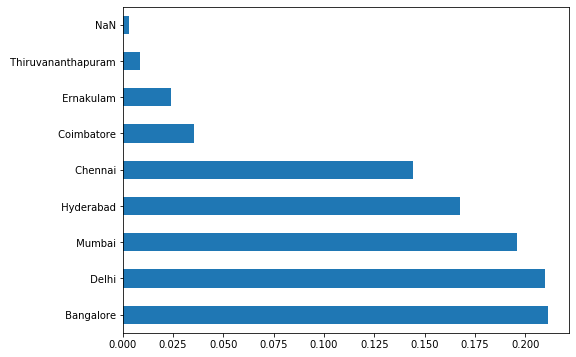

In [230]:
plt.figure(figsize=(8, 6))
Test['City'].value_counts(normalize=True).plot(kind='barh')

In [231]:
print(Test.City.value_counts)

<bound method IndexOpsMixin.value_counts of 0           Mumbai
1        Hyderabad
2          Chennai
3            Delhi
4        Bangalore
           ...    
1982     Bangalore
1983       Chennai
1984       Chennai
1985     Bangalore
1986       Chennai
Name: City, Length: 1987, dtype: object>


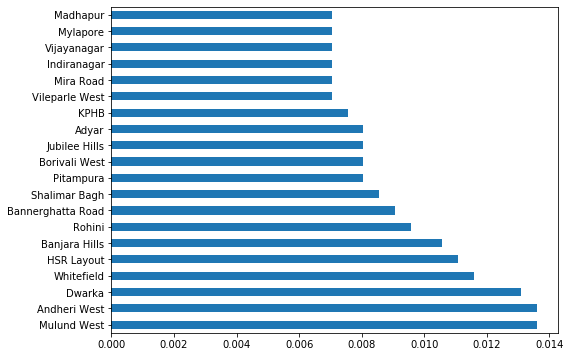

In [232]:
plt.figure(figsize=(8, 6))
Test['Locality'].value_counts(normalize=True)[:20].plot(kind='barh')

In [233]:
Test.Locality.value_counts

<bound method IndexOpsMixin.value_counts of 0         Ghatkopar East
1       West Marredpally
2               KK Nagar
3        New Ashok Nagar
4         Kanakpura Road
              ...       
1982        Basavanagudi
1983             Choolai
1984               Porur
1985             Arekere
1986        Pallikaranai
Name: Locality, Length: 1987, dtype: object>

In [234]:
Test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,...,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score,City,Locality
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,0,0,0,0,...,0,0,0,0,0,0,35,NaN,Mumbai,Ghatkopar East
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,0,0,0,0,...,0,0,0,0,0,0,31,NaN,Hyderabad,West Marredpally
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",0,0,0,0,...,0,0,0,0,0,0,40,70.0,Chennai,KK Nagar
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,1,0,0,0,...,0,0,0,0,0,0,0,NaN,Delhi,New Ashok Nagar
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,0,0,0,1,...,0,0,0,0,0,0,16,100.0,Bangalore,Kanakpura Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,1,0,0,0,...,0,0,0,0,0,0,10,NaN,Bangalore,Basavanagudi
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,0,0,0,0,...,0,0,0,0,0,0,4,NaN,Chennai,Choolai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,0,0,0,0,...,0,1,0,0,0,0,9,NaN,Chennai,Porur
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,0,0,0,1,...,0,0,0,0,0,0,12,98.0,Bangalore,Arekere


In [235]:
#Now droping the columns which we already used for the simplifying data & columns which are not providing any inputs to dataset

Test=Test.drop(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Miscellaneous_Info'], axis=1)
Test.head()

,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,dentist_cosmetic,...,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score,City,Locality
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,35,NaN,Mumbai,Ghatkopar East
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,31,NaN,Hyderabad,West Marredpally
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40,70.0,Chennai,KK Nagar
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,Delhi,New Ashok Nagar
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,16,100.0,Bangalore,Kanakpura Road


In [236]:
Test

,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,dentist_cosmetic,...,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score,City,Locality
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,35,NaN,Mumbai,Ghatkopar East
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,31,NaN,Hyderabad,West Marredpally
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40,70.0,Chennai,KK Nagar
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,Delhi,New Ashok Nagar
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,16,100.0,Bangalore,Kanakpura Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,NaN,Bangalore,Basavanagudi
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,NaN,Chennai,Choolai
1984,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,9,NaN,Chennai,Porur
1985,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,12,98.0,Bangalore,Arekere


In [237]:
Test.isna().sum()

ayurveda_bams                 0
ayurveda_ms                   0
ayurveda_md                   0
dentist_bds                   0
dentist_mds                   0
dentist_orthodontics          0
dentist_periodontics          0
dentist_prosthodontics        0
dentist_oralandmaxi           0
dentist_cosmetic              0
dermatology_md                0
dermatology_venereology       0
dermatology_leprosy           0
dermatology_dnb               0
dermatology_cosmetic          0
ent_ms                        0
ent_otorhinolaryngology       0
ent_oncology                  0
homeopath_bhms                0
homeopath_dhms                0
homeopath_md                  0
gm_md                         0
gm_cardio                     0
gm_surgery                    0
gm_diabet                     0
gm_child                      0
gm_chest                      0
gm_obstet                     0
gm_pulmonary                  0
gm_psych                      0
gm_endocrin                   0
gm_rheum

In [238]:
Test.rating_score.sample(10)

1464    100.0
326      98.0
705      96.0
674       NaN
1862      NaN
1552     97.0
1870     85.0
797     100.0
740       NaN
385       NaN
Name: rating_score, dtype: float64

In [239]:
#Here we can see that null values are present in rating_score column

print(Test['rating_score'].mean())

94.44147157190635


In [240]:
# Treat missing value with Mean rating
Test['rating_score'] = Test['rating_score'].fillna((Test['rating_score'].mean()))
Test.rating_score.sample(10)

847     100.000000
656      93.000000
1691     94.441472
930      94.441472
1782     96.000000
111     100.000000
1840     94.441472
1370     94.441472
1476     94.000000
1321     94.441472
Name: rating_score, dtype: float64

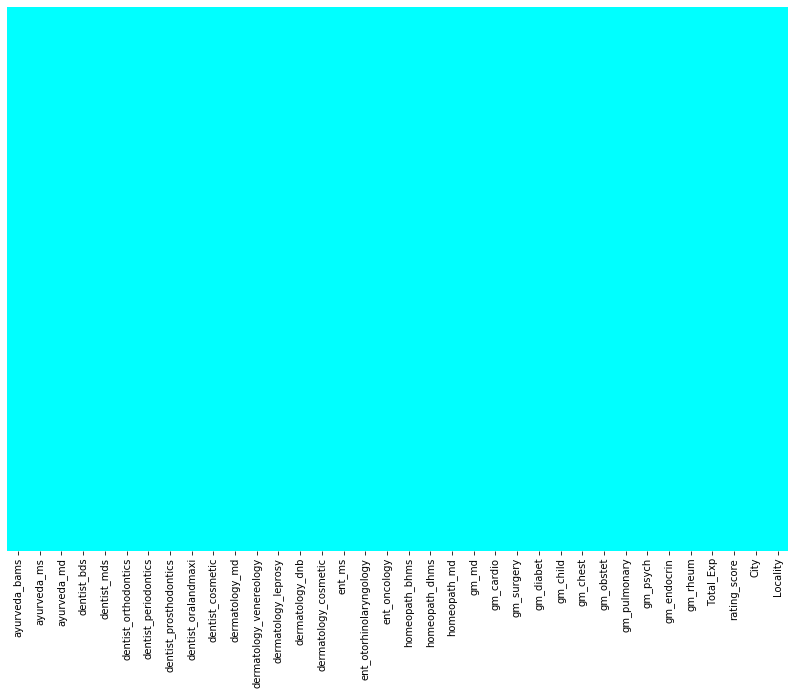

In [241]:
#seeing null value with heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(Test.isnull(),yticklabels=False, cbar=False, cmap='cool')

In [242]:
#Checking the summary of the dataset

Test.describe()

,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,dentist_cosmetic,...,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,...,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,0.122295,0.005033,0.024660,0.215400,0.120785,0.026170,0.016608,0.021137,0.016105,0.001007,...,0.030700,0.008556,0.004529,0.003523,0.003523,0.002013,0.001510,0.001007,17.874685,94.441472
std,0.327709,0.070781,0.155127,0.411203,0.325959,0.159681,0.127829,0.143878,0.125910,0.031718,...,0.172546,0.092123,0.067165,0.059264,0.059264,0.044834,0.038837,0.031718,11.366764,5.089688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,94.441472
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,94.441472
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,96.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.000000,100.000000


In [243]:
df_cor1=Test.corr()
df_cor1

,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,dentist_cosmetic,...,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score
ayurveda_bams,1.000000,0.190531,0.366553,-0.195582,-0.138353,-0.061191,-0.048509,-0.054852,-0.047756,-0.011849,...,-0.066430,-0.034675,-0.025179,-0.022195,-0.022195,-0.016765,-0.014515,-0.011849,0.001413,0.030210
ayurveda_ms,0.190531,1.000000,-0.011309,-0.037265,-0.026361,-0.011659,-0.009243,-0.010451,-0.009099,-0.002258,...,-0.012657,-0.006607,-0.004797,-0.004229,-0.004229,-0.003194,-0.002766,-0.002258,-0.017991,0.002342
ayurveda_md,0.366553,-0.011309,1.000000,-0.083314,-0.058936,-0.026066,-0.020664,-0.023366,-0.020343,-0.005047,...,-0.028298,-0.014771,-0.010726,-0.009454,-0.009454,-0.007142,-0.006183,-0.005047,-0.001673,0.032203
dentist_bds,-0.195582,-0.037265,-0.083314,1.000000,0.666069,0.297532,0.238446,0.263435,0.215000,0.060581,...,-0.093247,-0.048673,-0.035343,-0.031154,-0.031154,-0.023532,-0.020375,-0.016632,-0.207308,0.212554
dentist_mds,-0.138353,-0.026361,-0.058936,0.666069,1.000000,0.297176,0.338535,0.385729,0.345177,-0.011765,...,-0.065962,-0.034431,-0.025002,-0.022038,-0.022038,-0.016647,-0.014413,-0.011765,-0.134531,0.155032
dentist_orthodontics,-0.061191,-0.011659,-0.026066,0.297532,0.297176,1.000000,-0.021304,-0.002173,-0.020973,-0.005204,...,-0.029174,-0.015228,-0.011058,-0.009747,-0.009747,-0.007363,-0.006375,-0.005204,-0.051733,0.080061
dentist_periodontics,-0.048509,-0.009243,-0.020664,0.238446,0.338535,-0.021304,1.000000,0.008281,-0.016626,0.120064,...,-0.023128,-0.012072,-0.008766,-0.007727,-0.007727,-0.005837,-0.005053,-0.004125,-0.034954,0.058267
dentist_prosthodontics,-0.054852,-0.010451,-0.023366,0.263435,0.385729,-0.002173,0.008281,1.000000,-0.018800,0.105672,...,-0.026152,-0.013651,-0.009912,-0.008737,-0.008737,-0.006600,-0.005714,-0.004664,-0.071348,0.072717
dentist_oralandmaxi,-0.047756,-0.009099,-0.020343,0.215000,0.345177,-0.020973,-0.016626,-0.018800,1.000000,-0.004061,...,-0.022769,-0.011885,-0.008630,-0.007607,-0.007607,-0.005746,-0.004975,-0.004061,-0.056640,0.046747
dentist_cosmetic,-0.011849,-0.002258,-0.005047,0.060581,-0.011765,-0.005204,0.120064,0.105672,-0.004061,1.000000,...,-0.005649,-0.002949,-0.002141,-0.001887,-0.001887,-0.001426,-0.001234,-0.001008,-0.030376,0.034675


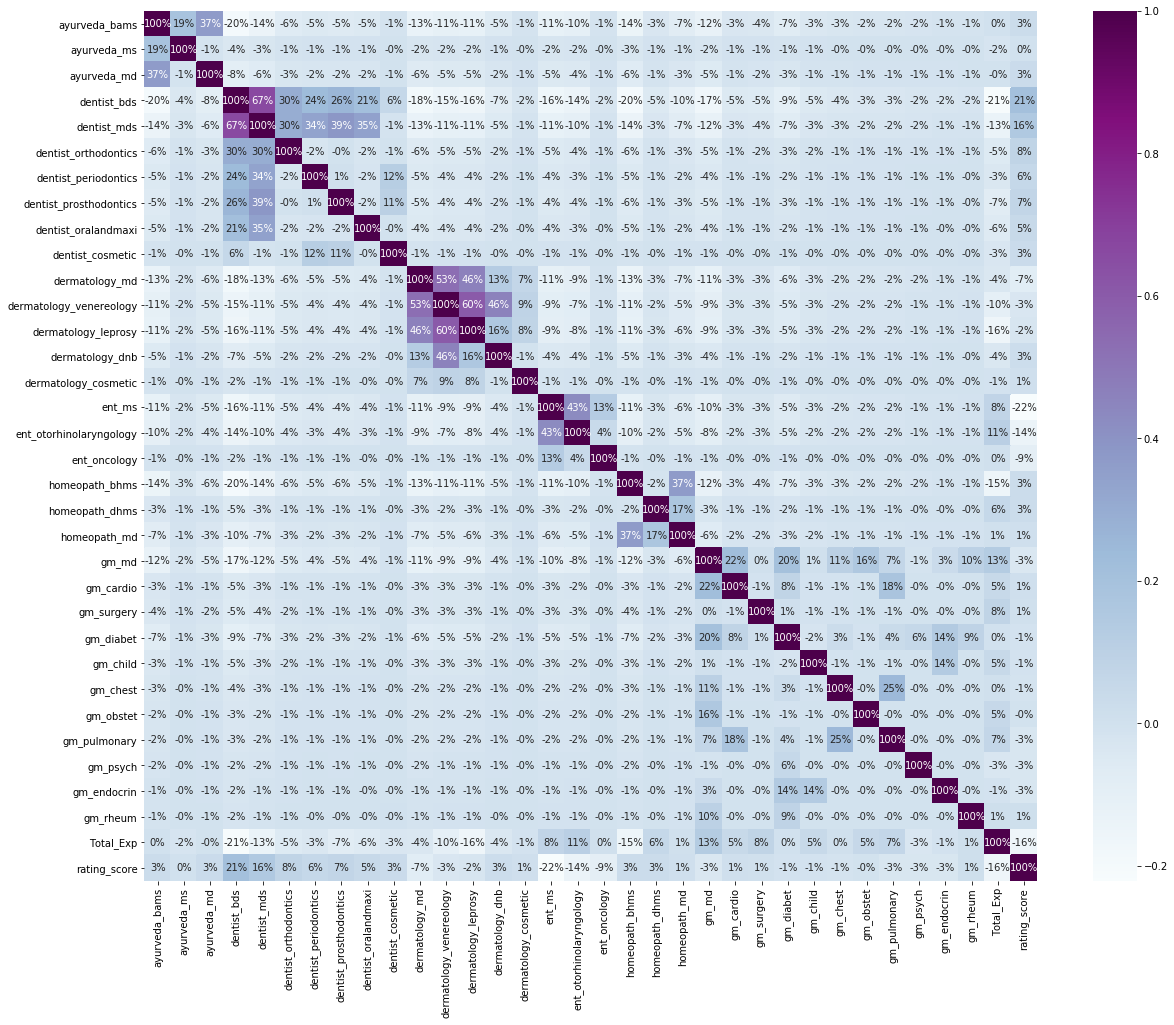

In [244]:
#Heatmap

plt.figure(figsize=(20, 16))
sns.heatmap(df_cor1, annot=True, fmt='.0%', cmap='BuPu')
plt.show()

In [245]:
Test.dtypes

ayurveda_bams                int32
ayurveda_ms                  int32
ayurveda_md                  int32
dentist_bds                  int32
dentist_mds                  int32
dentist_orthodontics         int32
dentist_periodontics         int32
dentist_prosthodontics       int32
dentist_oralandmaxi          int32
dentist_cosmetic             int32
dermatology_md               int32
dermatology_venereology      int32
dermatology_leprosy          int32
dermatology_dnb              int32
dermatology_cosmetic         int32
ent_ms                       int32
ent_otorhinolaryngology      int32
ent_oncology                 int32
homeopath_bhms               int32
homeopath_dhms               int32
homeopath_md                 int32
gm_md                        int32
gm_cardio                    int32
gm_surgery                   int32
gm_diabet                    int32
gm_child                     int32
gm_chest                     int32
gm_obstet                    int32
gm_pulmonary        

In [246]:
# Import label encoder 
# Now lets replace the categorical values (alphabetic values) to numeric values using Label Encoder
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Lets Encode labels in columns 
Test['City']= label_encoder.fit_transform(Test['City'])
Test['Locality']= label_encoder.fit_transform(Test['Locality'])
Test.head()

,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,dentist_cosmetic,...,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score,City,Locality
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,35,94.441472,6,142
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,31,94.441472,5,578
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40,70.000000,1,212
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,94.441472,3,374
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,16,100.000000,0,231


In [247]:
X=Test

In [248]:
X.head()

,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,dentist_cosmetic,...,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score,City,Locality
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,35,94.441472,6,142
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,31,94.441472,5,578
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40,70.000000,1,212
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,94.441472,3,374
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,16,100.000000,0,231


In [249]:
#scaling the input variable 
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
X=pd.DataFrame(X, columns=Test.columns)
X.head()

,ayurveda_bams,ayurveda_ms,ayurveda_md,dentist_bds,dentist_mds,dentist_orthodontics,dentist_periodontics,dentist_prosthodontics,dentist_oralandmaxi,dentist_cosmetic,...,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum,Total_Exp,rating_score,City,Locality
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,35,94.441472,6,142
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,31,94.441472,5,578
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40,70.000000,1,212
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,94.441472,3,374
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,16,100.000000,0,231


In [250]:
X_test = X.values

In [251]:
X_test.shape

(1987, 36)

In [252]:
#Checking the shape of input and target variable

print(x.shape, '\t\t', y.shape)

(5961, 36) 		 (5961,)


In [273]:
x.shape, y.shape, X_test.shape

((5961, 36), (5961,), (1987, 36))

In [277]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=42)

In [278]:
print(x_train.shape, '\t', x_test.shape)

(4768, 36) 	 (1193, 36)


In [279]:
print(y_train.shape, '\t', y_test.shape)

(4768,) 	 (1193,)


In [280]:
X_test.shape

(1987, 36)

# Predicting X_test datastet

In [281]:
#importing library

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Importing error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [282]:
model=[LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(), Lasso(), Ridge(), ElasticNet()]
for m in model:
    m.fit(x_train, y_train)
    print('Score of', m, 'is: ', m.score(x_train, y_train))
    predm=m.predict(X_test)
    print('\n')
    print('********************************************************************************')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is:  0.12672710785012842


********************************************************************************
Score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) is:  0.8809204682359767


********************************************************************************
Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, 

In [283]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(), Lasso(), Ridge(), ElasticNet()]
for m in model:
    score=cross_val_score(m, x, y, cv=5, scoring='r2')
    print('Score of', m, 'is:')
    print('\n')
    print('Score :', score)
    print('Mean Score :', score.mean())
    print('Standard deviation:', score.std())
    print('\n')
    print('*******************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is:


Score : [0.10488231 0.09327398 0.1262972  0.11173557 0.12420114]
Mean Score : 0.11207804022583163
Standard deviation: 0.012285297309460508


*******************************************************************************************************


Score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) is:


Score : [0.1809636  0.15022426 0.20274188 0.14685374 0.16720347]
Mean Score : 0.1695973892928487
Standard deviation: 0.02062072066153963


*******

Random forest regressor model is working correctly upto certain extent. So finalising the RFR model as a filnal prdiction model.

In [298]:
#Passing the Test dataset to predict the Doctor's fees.

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)
print(rfr.score(x_train, y_train))
predrfr=rfr.predict(X_test)
print('\n')

0.878384485947368




# Predicting Doctor's fees

In [302]:
#Predicted doctor's fees for Test dataset

predrfr

array([312.5, 340.5, 317. , ..., 354.6, 309. , 350. ])

# Model is Under Fitting/Incomplete/Incorrect model.